In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 275.4/363.4 MB 59.6 MB/s eta 0:00:02

In [ ]:
!pip list

In [ ]:
import os
import sys
import torch
import torch.nn as nn
import pandas as pd
from torchvision import transforms, models
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import glob
from pathlib import Path
from ultralytics import YOLO
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                           roc_auc_score, confusion_matrix, classification_report)
from sklearn.preprocessing import label_binarize
import seaborn as sns
print(pd.__version__)
print(torch.__version__)
print(np.__version__)
print(Image.__version__)

In [ ]:
### This new code block allows you to upload your model on to google drive which we can download using the functions and links below.
!pip install -q gdown
import gdown

## Use this code to download your models and labels.txt, by changing the folder_id. Get the folder ID from the google drive url
model_folder_id = '1-8fzRftVyMGZ6SfPWKPNJIirxkZYuX7i'   ## Replace this id with your folder id
#1-8fzRftVyMGZ6SfPWKPNJIirxkZYuX7i backup id
gdown.download_folder(id=model_folder_id, output="model", quiet=False, use_cookies=False)  ## download the content into the colab environment.

Retrieving folder contents


Retrieving folder 1kXxtp09noweHPrgFhsG5NQAtred-N_F2 test_images
Processing file 1thKyrWL6QgMCfID4iBC89e28xFr38L-p best_cnn_model.pth
Processing file 1Uk2k055ANelYKy8YyrvwSw9Gb8ONl9DY best-cls.pt
Processing file 1j8FZNgaeqrQ9VsjWUwmOWr67Z2lPyjua best.pt
Processing file 14gk9VWIl9N9BEm9od9oHc6ycEpb31AxB best1.pt
Processing file 1z9puIF7GEe672zibx92ncpT4lPdHavDR drive-downloadlink.txt
Processing file 10-5HmoYzQHmSoDH71inWbcCSTL0BmcEN EARENDEL-NAIC
Processing file 1qzqEhd2AbWMpfX67wIMpn4uakHtjwqhW Final.zip
Processing file 1PKaIAKMA5WdpYp0wI8xsOL3NUa0VI91K prediction.py
Processing file 1DmHak8aW-bnWLHryifwNNFmvFETRLB-n Readme.md
Processing file 1y5Y077tMRhe8oIdxCRe95Xxp4W7g5hR9 requirement.txt


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1thKyrWL6QgMCfID4iBC89e28xFr38L-p
From (redirected): https://drive.google.com/uc?id=1thKyrWL6QgMCfID4iBC89e28xFr38L-p&confirm=t&uuid=8048962c-5760-4c06-a246-fc7be56e686e
To: /content/model/best_cnn_model.pth
100%|██████████| 94.4M/94.4M [00:01<00:00, 90.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Uk2k055ANelYKy8YyrvwSw9Gb8ONl9DY
To: /content/model/best-cls.pt
100%|██████████| 11.0M/11.0M [00:00<00:00, 48.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1j8FZNgaeqrQ9VsjWUwmOWr67Z2lPyjua
To: /content/model/best.pt
100%|██████████| 19.1M/19.1M [00:00<00:00, 76.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=14gk9VWIl9N9BEm9od9oHc6ycEpb31AxB
To: /content/model/best1.pt
100%|██████████| 19.1M/19.1M [00:00<00:00, 83.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z9puIF7GEe672zi

['model/best_cnn_model.pth',
 'model/best-cls.pt',
 'model/best.pt',
 'model/best1.pt',
 'model/drive-downloadlink.txt',
 'model/EARENDEL-NAIC',
 'model/Final.zip',
 'model/prediction.py',
 'model/Readme.md',
 'model/requirement.txt']

In [ ]:
##Changes here in v2
## Use this code to download the testing folder. You must include these 2 lines without any changes
test_folder_id = '1LZIhiV9l82W4fNpfaBHyGvh8XBX6SoU2'
gdown.download_folder(id=test_folder_id, output="test_folder", quiet=False, use_cookies=False)

Retrieving folder contents


Retrieving folder 1qO-cQtRdp-hLu6LMQ68OEv0zA791puJO test_images
Processing file 1cxftTp4A1_13gWe4QeAlhK9AcGzIDBEH Kek Lapis.jpg
Processing file 1aqVkDJiANm0MqLeTJALC1RuKZgt0IlI4 Kuih Kaswi Pandan.jpg
Processing file 11K7Hc9nt3Qllw4lG4ajxineVHvXKmuY6 Kuih Ketayap.jpg
Processing file 1qTcPAX5eSPLkAkhlyGfgooDXHZPFoJOM Kuih Lapis.jpg
Processing file 17CPxIkfU_tecxiF1-G4nXTD0Vv_1biB- Kuih Seri Muka.png
Processing file 1MEhhjAoBK66wtj6Xs1orsrA2vR9qLjhR Kuih Talam.jpg
Processing file 1KmI2JRpz4DnCAmPbCWoK31BJBH4ax8i7 Kuih Ubi Kayu.jpg
Processing file 1QFZdtM4ok-vH0kPgA7gdZQzT1aSppWcF Onde-Onde.jpg
Processing file 12ufiwhl6whVp33F05RLiDRieRSN13XlP test_labels.txt


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1cxftTp4A1_13gWe4QeAlhK9AcGzIDBEH
To: /content/test_folder/test_images/Kek Lapis.jpg
100%|██████████| 1.27M/1.27M [00:00<00:00, 96.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aqVkDJiANm0MqLeTJALC1RuKZgt0IlI4
To: /content/test_folder/test_images/Kuih Kaswi Pandan.jpg
100%|██████████| 418k/418k [00:00<00:00, 86.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=11K7Hc9nt3Qllw4lG4ajxineVHvXKmuY6
To: /content/test_folder/test_images/Kuih Ketayap.jpg
100%|██████████| 373k/373k [00:00<00:00, 104MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qTcPAX5eSPLkAkhlyGfgooDXHZPFoJOM
To: /content/test_folder/test_images/Kuih Lapis.jpg
100%|██████████| 56.6k/56.6k [00:00<00:00, 55.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=17CPxIkfU_tecxiF1-G4nXTD0Vv_1biB-
To: /content/test_folder/test_images/Kuih 

['test_folder/test_images/Kek Lapis.jpg',
 'test_folder/test_images/Kuih Kaswi Pandan.jpg',
 'test_folder/test_images/Kuih Ketayap.jpg',
 'test_folder/test_images/Kuih Lapis.jpg',
 'test_folder/test_images/Kuih Seri Muka.png',
 'test_folder/test_images/Kuih Talam.jpg',
 'test_folder/test_images/Kuih Ubi Kayu.jpg',
 'test_folder/test_images/Onde-Onde.jpg',
 'test_folder/test_labels.txt']

In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!tree

.
├── model
│   ├── best1.pt
│   ├── best-cls.pt
│   ├── best_cnn_model.pth
│   ├── best.pt
│   ├── Final (2).zip
│   ├── prediction_ct.py
│   ├── Readme.md
│   ├── requirement.txt
│   └── test_images
├── predictions.csv
├── sample_data
│   ├── anscombe.json
│   ├── california_housing_test.csv
│   ├── california_housing_train.csv
│   ├── mnist_test.csv
│   ├── mnist_train_small.csv
│   └── README.md
└── test_folder
    ├── test_images
    │   ├── Kek Lapis.jpg
    │   ├── Kuih Kaswi Pandan.jpg
    │   ├── Kuih Ketayap.jpg
    │   ├── Kuih Lapis.jpg
    │   ├── Kuih Seri Muka.png
    │   ├── Kuih Talam.jpg
    │   ├── Kuih Ubi Kayu.jpg
    │   └── Onde-Onde.jpg
    └── test_labels.txt

5 directories, 24 files


In [ ]:
# Define paths
MAIN_DIR = os.path.abspath(os.getcwd())
img_dir = os.path.join(MAIN_DIR, "test_folder", "test_images")
MODEL_DIR = os.path.join(MAIN_DIR, "model")
CNN_MODEL_PATH = os.path.join(MODEL_DIR,"best_cnn_model.pth")
YOLO_MODEL_PATH = os.path.join(MODEL_DIR,"best.pt")
YOLO_MODEL_PATH_1 = os.path.join(MODEL_DIR,"best1.pt")
YOLO_CLS_PATH = os.path.join(MODEL_DIR, "best-cls.pt")
test_labels_path = os.path.join(MAIN_DIR, "test_folder", "test_labels.txt")
print(MAIN_DIR)
print(MODEL_DIR)
print(img_dir)
print(CNN_MODEL_PATH)
print(YOLO_MODEL_PATH)
print(YOLO_MODEL_PATH_1)
print(YOLO_CLS_PATH)

/content
/content/model
/content/test_folder/test_images
/content/model/best_cnn_model.pth
/content/model/best.pt
/content/model/best1.pt
/content/model/best-cls.pt


In [ ]:
# Define constants
CLASSES = ["kek_lapis", "kuih_kaswi_pandan", "Kuih_Ketayap","Kuih_Lapis", "Kuih_Seri_Muka", "Kuih_Talam", "Kuih_Ubi_Kayu", "Onde_Onde"]#cnn
names = ['kek_lapis', 'Kuih_Bahulu', 'kuih_kaswi_pandan', 'Kuih_Ketayap','Kuih_Ubi_Kayu', 'Kuih_Lapis', 'Kuih_Seri_Muka', 'Kuih_Talam', 'Onde_Onde']# yolo
clsnames =  ['Kuih_Ketayap','Kuih_Lapis','Kuih_Seri_Muka','Kuih_Talam','Kuih_Ubi_Kayu','Onde_Onde','kek_lapis','kuih_kaswi_pandan']#yolo cls

correct_names = {
  "kek_lapis": "Kek Lapis",
  "kuih_kaswi_pandan": "Kuih Kaswi Pandan",
  "Kuih_Ketayap": "Kuih Ketayap",
  "Kuih_Lapis": "Kuih Lapis",
  "Kuih_Seri_Muka": "Kuih Seri Muka",
  "Kuih_Talam": "Kuih Talam",
  "Kuih_Ubi_Kayu": "Kuih Ubi Kayu",
  "Onde_Onde": "Onde-Onde"
}

# Create a mapping from corrected names back to original class names for index lookup
reverse_correct_names = {v: k for k, v in correct_names.items()}

# Create a unified class list for consistent indexing
UNIFIED_CLASSES = list(correct_names.keys())
FULL_NUM_CLASSES = len(UNIFIED_CLASSES)

def load_true_labels(test_labels_path):
    """
    Load true labels from test_labels.txt file
    """
    if not os.path.exists(test_labels_path):
        print(f"Error: Test labels file not found at {test_labels_path}")
        return None

    try:
        # Read the CSV file
        df = pd.read_csv(test_labels_path)

        # Create a dictionary mapping filename to true label
        true_labels_dict = {}
        for _, row in df.iterrows():
            filename = row['Filename'].strip('"')  # Remove quotes if present
            true_label = row['Class'].strip('"')   # Remove quotes if present
            true_labels_dict[filename] = true_label

        print(f"Loaded {len(true_labels_dict)} true labels from {test_labels_path}")
        return true_labels_dict

    except Exception as e:
        print(f"Error loading true labels: {str(e)}")
        return None

def get_true_class_index(true_label_name):
    """
    Convert true label name to class index using the unified class mapping
    """
    # First try to find the original class name that maps to this corrected name
    original_class = reverse_correct_names.get(true_label_name, true_label_name)

    # Find index in unified classes
    if original_class in UNIFIED_CLASSES:
        return UNIFIED_CLASSES.index(original_class)
    else:
        # Try direct lookup in case the true label uses original naming
        for i, unified_class in enumerate(UNIFIED_CLASSES):
            if correct_names[unified_class] == true_label_name:
                return i

        print(f"Warning: True label '{true_label_name}' not found in class mapping")
        return -1  # Return -1 for unknown classes

def load_cnn_model():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    if not os.path.exists(CNN_MODEL_PATH):
        print(f"Error: CNN model not found at {CNN_MODEL_PATH}")
        sys.exit(1)

    model = models.resnet50(weights = None)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, len(CLASSES))

    model.load_state_dict(torch.load(CNN_MODEL_PATH, map_location=device))
    model = model.to(device)
    model.eval()

    return model, device

def load_yolo_model():
    if not os.path.exists(YOLO_MODEL_PATH):
        print(f"Error: YOLO model not found at {YOLO_MODEL_PATH}")
        sys.exit(1)
    return YOLO(YOLO_MODEL_PATH)

def load_yolo_model_1():
    if not os.path.exists(YOLO_MODEL_PATH_1):
        print(f"Error: YOLO model not found at {YOLO_MODEL_PATH_1}")
        sys.exit(1)
    return YOLO(YOLO_MODEL_PATH_1)

def load_yolo_cls():
    if not os.path.exists(YOLO_CLS_PATH):
        print(f"Error: YOLO classification model not found at {YOLO_CLS_PATH}")
        sys.exit(1)
    return YOLO(YOLO_CLS_PATH)

def predict_with_cnn(model, device, img_path):
    transform = transforms.Compose([
        transforms.Resize(640),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    if not os.path.exists(img_path):
        print(f"Error: Image not found at {img_path}")
        return None, 0.0, np.zeros(len(CLASSES))

    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_tensor)
        probs = torch.softmax(outputs, dim=1)
        conf, pred_idx = torch.max(probs, 1)

    pred_class = CLASSES[pred_idx.item()]
    confidence = conf.item()

    return pred_class, confidence, probs.squeeze().cpu().numpy()

def predict_with_yolo(model, img_path):
    if not os.path.exists(img_path):
        print(f"Error: Image not found at {img_path}")
        return None, 0.0, np.zeros(len(names))

    results = model(img_path, conf=0.25)

    probs = np.zeros(len(names))
    pred_class = None
    confidence = 0.0

    result = results[0]

    if len(result.boxes) > 0:
        boxes = result.boxes
        class_ids = boxes.cls.cpu().numpy().astype(int)
        confidences = boxes.conf.cpu().numpy()

        max_conf_idx = np.argmax(confidences)
        class_id = class_ids[max_conf_idx]
        confidence = confidences[max_conf_idx]

        class_name = result.names[class_id]

        if class_name in names:
            pred_class = class_name
            probs[names.index(pred_class)] = confidence
        else:
            print(f"Warning: YOLO detected '{class_name}' which is not in our class list")

    return pred_class, confidence, probs

def predict_with_yolo_cls(model, img_path):
    if not os.path.exists(img_path):
        print(f"Error: Image not found at {img_path}")
        return None, 0.0, np.zeros(len(clsnames))

    results = model(img_path, conf=0.25)

    probs = np.zeros(len(clsnames))
    pred_class = None
    confidence = 0.0

    result = results[0]

    if hasattr(result, 'probs') and result.probs is not None:
        class_probs = result.probs.data.cpu().numpy()
        max_conf_idx = np.argmax(class_probs)
        confidence = class_probs[max_conf_idx]
        pred_class = clsnames[max_conf_idx]
        probs = class_probs

    return pred_class, confidence, probs

def get_class_index(predicted_class_name):
    """Get the class index for the predicted class name"""
    # First convert back to original class name if it was corrected
    original_class = reverse_correct_names.get(predicted_class_name, predicted_class_name)

    # Find index in unified classes
    if original_class in UNIFIED_CLASSES:
        return UNIFIED_CLASSES.index(original_class)
    else:
        print(f"Warning: Class '{predicted_class_name}' not found in unified classes")
        return -1  # Return -1 for unknown classes

def normalize_confidence_array(confidence_array, source_classes, target_classes):
    """
    Normalize confidence arrays to match the unified class structure
    """
    normalized = np.zeros(len(target_classes))

    for i, target_class in enumerate(target_classes):
        if target_class in source_classes:
            source_idx = source_classes.index(target_class)
            if source_idx < len(confidence_array):
                normalized[i] = confidence_array[source_idx]

    return normalized

def predict_dessert(img_path, save_visualization=True):
    coeffs = np.array([0.14, 0.32, 0.32, 0.22]) # coeff for cnn, yolo, yolocls

    try:
        global cnn_model, cnn_device, yolo_model, yolo_model_1, yolo_cls_model
    except NameError:
        print("Loading models...")
        cnn_model, cnn_device = load_cnn_model()
        yolo_model = load_yolo_model()
        yolo_model_1 = load_yolo_model_1()
        yolo_cls_model = load_yolo_cls()
        print("Models loaded successfully!")

    cnn_class, cnn_conf, cnn_probs = predict_with_cnn(cnn_model, cnn_device, img_path)
    yolo_class, yolo_conf, yolo_probs = predict_with_yolo(yolo_model, img_path)
    yolo_class1, yolo_conf1, yolo_probs1 = predict_with_yolo(yolo_model_1, img_path)
    yolo_cls_class, yolo_cls_conf, yolo_cls_probs = predict_with_yolo_cls(yolo_cls_model, img_path)

    # Normalize all confidence arrays to unified class structure
    cnn_conf_normalized = normalize_confidence_array(cnn_probs, CLASSES, UNIFIED_CLASSES)
    yolo_conf_normalized = normalize_confidence_array(yolo_probs, names, UNIFIED_CLASSES)
    yolo_cls_conf_normalized = normalize_confidence_array(yolo_cls_probs, clsnames, UNIFIED_CLASSES)

    # Calculate overall confidence by weighted average
    overall_conf = (coeffs[0] * cnn_conf_normalized +
                   coeffs[1] * yolo_conf_normalized +
                   coeffs[3] * yolo_cls_conf_normalized)

    predictions = [cnn_class, yolo_class, yolo_class1, yolo_cls_class]
    confidences = [cnn_conf, yolo_conf, yolo_conf1, yolo_cls_conf]
    coeff_conf = np.multiply(confidences, coeffs)
    valid_predictions = [p for p in predictions if p is not None]

    if not valid_predictions:
        print("No valid predictions made")
        pred_class = "No detection"
        pred_conf = 0.0
    else:
        vote_counts = {}
        for pred in valid_predictions:
            vote_counts[pred] = vote_counts.get(pred, 0) + 1

        max_votes = max(vote_counts.values())
        majority_classes = [cls for cls, count in vote_counts.items() if count == max_votes]

        if len(majority_classes) == 1:
            pred_class = majority_classes[0]
            pred_conf = np.mean([conf for pred, conf in zip(predictions, confidences) if pred == pred_class])
        else:
            valid_indices = [i for i, pred in enumerate(predictions) if pred is not None]
            max_conf_idx = valid_indices[np.argmax([coeff_conf[i] for i in valid_indices])]
            pred_class = predictions[max_conf_idx]
            pred_conf = confidences[max_conf_idx]

    # Convert to correct name format
    if pred_class != "No detection":
        pred_class = correct_names.get(pred_class, pred_class)

    print(f"Combined prediction (majority vote): {pred_class} with confidence {pred_conf:.4f}")

    # Show visualization only if requested
    if save_visualization:
        img = Image.open(img_path).convert('RGB')
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.title(f"Prediction: {pred_class} (Confidence: {pred_conf:.4f})")
        plt.axis('off')
        plt.show()

    # Return all confidence arrays
    return pred_class, pred_conf, cnn_conf_normalized, yolo_conf_normalized, yolo_cls_conf_normalized, overall_conf

def evaluate_model_performance(predictions_df, true_labels_dict):
    """
    Evaluate model performance using various metrics
    """
    print("\n" + "="*60)
    print("🎯 MODEL EVALUATION RESULTS")
    print("="*60)

    # Filter out images that have true labels
    valid_predictions = []
    y_true = []
    y_pred = []
    y_probs = []

    for _, row in predictions_df.iterrows():
        filename = row['filename']

        if filename in true_labels_dict:
            true_label = true_labels_dict[filename]
            true_class_index = get_true_class_index(true_label)
            pred_class_index = row['predicted_class_index']

            if true_class_index != -1 and pred_class_index != -1:
                valid_predictions.append({
                    'filename': filename,
                    'true_label': true_label,
                    'true_class_index': true_class_index,
                    'pred_label': row['predicted_class_label'],
                    'pred_class_index': pred_class_index
                })

                y_true.append(true_class_index)
                y_pred.append(pred_class_index)
                y_probs.append(row['overall_confidence'])

    if len(valid_predictions) == 0:
        print("❌ No valid predictions found for evaluation!")
        return None

    print(f"📊 Evaluating {len(valid_predictions)} valid predictions")

    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_probs = np.array(y_probs)

    # Number of classes
    n_classes = FULL_NUM_CLASSES
    class_names = list(range(FULL_NUM_CLASSES))

    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f"\n✅ Accuracy: {acc:.4f}")

    # Precision, Recall, F1 per class & macro
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=class_names, average=None, zero_division=0)
    macro_prec, macro_rec, macro_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)

    print("\n📊 Per-class metrics:")
    for i, cls in enumerate(class_names):
        class_name = correct_names[UNIFIED_CLASSES[i]]
        print(f"Class {cls} ({class_name}): Precision={prec[i]:.4f}, Recall={rec[i]:.4f}, F1={f1[i]:.4f}")

    print(f"\n📦 Macro Precision: {macro_prec:.4f}, Macro Recall: {macro_rec:.4f}, Macro F1: {macro_f1:.4f}")

    # ROC AUC (requires binarized labels)
    try:
        y_true_bin = label_binarize(y_true, classes=class_names)

        # Handle case where only one class is present
        if y_true_bin.shape[1] == 1:
            print("\n⚠️ Only one class present in true labels, ROC AUC cannot be computed")
        else:
            # ROC AUC per class and macro
            auc_per_class = roc_auc_score(y_true_bin, y_probs, average=None, multi_class='ovr')
            auc_macro = roc_auc_score(y_true_bin, y_probs, average='macro', multi_class='ovr')

            print("\n🎯 ROC AUC per class:")
            for i, cls in enumerate(class_names):
                if i < len(auc_per_class):
                    class_name = correct_names[UNIFIED_CLASSES[i]]
                    print(f"Class {cls} ({class_name}): AUC = {auc_per_class[i]:.4f}")

            print(f"\n🌐 Macro ROC AUC: {auc_macro:.4f}")

    except Exception as e:
        print(f"⚠️ ROC AUC could not be computed: {e}")

    # Confusion Matrix
    print("\n🔍 Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred, labels=class_names)

    # Create confusion matrix plot
    plt.figure(figsize=(10, 8))
    class_labels = [f"{i}\n{correct_names[UNIFIED_CLASSES[i]]}" for i in class_names]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Detailed classification report
    print("\n📋 Classification Report:")
    target_names = [correct_names[UNIFIED_CLASSES[i]] for i in class_names]
    print(classification_report(y_true, y_pred, target_names=target_names, zero_division=0))

    # Show some example predictions
    print("\n🔍 Sample Predictions:")
    print("-" * 80)
    print(f"{'Filename':<20} {'True Label':<20} {'Predicted Label':<20} {'Correct':<10}")
    print("-" * 80)

    for i, pred in enumerate(valid_predictions[:10]):  # Show first 10
        is_correct = "✅" if pred['true_class_index'] == pred['pred_class_index'] else "❌"
        print(f"{pred['filename']:<20} {pred['true_label']:<20} {pred['pred_label']:<20} {is_correct:<10}")

    if len(valid_predictions) > 10:
        print(f"... and {len(valid_predictions) - 10} more predictions")

    # Create evaluation summary dictionary
    evaluation_results = {
        'accuracy': acc,
        'macro_precision': macro_prec,
        'macro_recall': macro_rec,
        'macro_f1': macro_f1,
        'per_class_precision': prec.tolist(),
        'per_class_recall': rec.tolist(),
        'per_class_f1': f1.tolist(),
        'confusion_matrix': cm.tolist(),
        'valid_predictions_count': len(valid_predictions),
        'class_mapping': {i: correct_names[UNIFIED_CLASSES[i]] for i in class_names}
    }

    return evaluation_results, valid_predictions

def run_on_directory_with_csv_and_evaluation(img_dir, test_labels_path, output_csv="predictions.csv", show_visualizations=False):
    """
    Process all images in directory, save results to CSV, and perform comprehensive evaluation
    """
    if not os.path.isdir(img_dir):
        print(f"Error: Directory not found at {img_dir}")
        return

    # Load true labels
    true_labels_dict = load_true_labels(test_labels_path)
    if true_labels_dict is None:
        print("Cannot proceed without true labels!")
        return

    # Use a set to avoid duplicates and then convert to sorted list
    img_files = set()
    for ext in ['jpg', 'jpeg', 'png']:
        img_files.update(glob.glob(os.path.join(img_dir, f"*.{ext}")))
        img_files.update(glob.glob(os.path.join(img_dir, f"*.{ext.upper()}")))

    img_files = sorted(list(img_files))  # Convert to sorted list
    print(f"Found {len(img_files)} images to process")

    # Initialize lists to store results
    results = []

    for i, img_path in enumerate(img_files, 1):
        filename = os.path.basename(img_path)
        print(f"\nProcessing {i}/{len(img_files)}: {filename}")

        try:
            pred_class, pred_conf, cnn_conf_array, yolo_conf_array, cls_conf_array, overall_conf_array = predict_dessert(
                img_path, save_visualization=show_visualizations)

            # Get class index
            class_index = get_class_index(pred_class) if pred_class != "No detection" else -1

            # Convert numpy arrays to lists for CSV storage
            cnn_conf_list = cnn_conf_array.tolist()
            yolo_conf_list = yolo_conf_array.tolist()
            cls_conf_list = cls_conf_array.tolist()
            overall_conf_list = overall_conf_array.tolist()

            # Store results
            results.append({
                'filename': filename,
                'predicted_class_index': class_index,
                'predicted_class_label': pred_class,
                'cnn_confidence': cnn_conf_list,
                'yolo_confidence': yolo_conf_list,
                'cls_confidence': cls_conf_list,
                'overall_confidence': overall_conf_list
            })

        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")
            # Create zero arrays for failed predictions
            zero_conf = [0.0] * len(UNIFIED_CLASSES)
            results.append({
                'filename': filename,
                'predicted_class_index': -1,
                'predicted_class_label': "Error",
                'cnn_confidence': zero_conf,
                'yolo_confidence': zero_conf,
                'cls_confidence': zero_conf,
                'overall_confidence': zero_conf
            })

    # Convert to DataFrame
    df = pd.DataFrame(results)

    # Save to CSV
    df.to_csv(output_csv, index=False)
    print(f"\nResults saved to {output_csv}")

    # Display summary
    print(f"\nSummary:")
    print(f"Total images processed: {len(df)}")
    print(f"Successful predictions: {len(df[df['predicted_class_label'] != 'Error'])}")
    print(f"Failed predictions: {len(df[df['predicted_class_label'] == 'Error'])}")
    print(f"No detections: {len(df[df['predicted_class_label'] == 'No detection'])}")

    # Show class distribution
    if len(df[df['predicted_class_label'] != 'Error']) > 0:
        print(f"\nClass distribution:")
        class_counts = df[df['predicted_class_label'] != 'Error']['predicted_class_label'].value_counts()
        for class_name, count in class_counts.items():
            print(f"  {class_name}: {count}")

    # Display class mapping for reference
    print(f"\nClass Index Mapping:")
    for i, class_name in enumerate(UNIFIED_CLASSES):
        print(f"  {i}: {correct_names[class_name]}")

    # Perform evaluation
    evaluation_results, valid_predictions = evaluate_model_performance(df, true_labels_dict)

    return df, evaluation_results, valid_predictions


Loading models...
Models loaded successfully!

Dessert Recognition System with Evaluation
1. Predict all images in directory (with visualization)
2. Predict all images and save to CSV
3. Predict all images and save to CSV (with visualization)
4. Predict, save to CSV, and evaluate model performance
5. Predict, save to CSV, evaluate with visualization
6. Exit
Loaded 8 true labels from /content/test_folder/test_labels.txt
Found 8 images to process

Processing 1/8: Kek Lapis.jpg

image 1/1 /content/test_folder/test_images/Kek Lapis.jpg: 640x640 6 kek_lapiss, 15.6ms
Speed: 14.3ms preprocess, 15.6ms inference, 286.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/test_folder/test_images/Kek Lapis.jpg: 640x640 6 kek_lapiss, 15.6ms
Speed: 3.1ms preprocess, 15.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/test_folder/test_images/Kek Lapis.jpg: 640x640 kek_lapis 1.00, Kuih_Ubi_Kayu 0.00, Kuih_Ketayap 0.00, kuih_kaswi_pandan 0.00, K

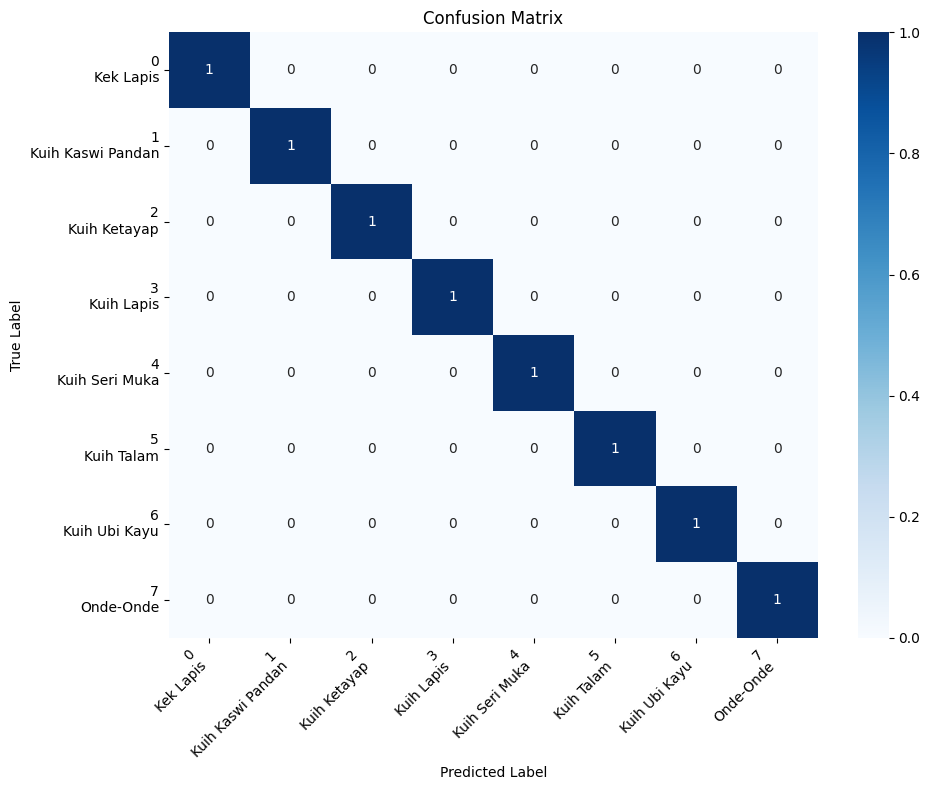


📋 Classification Report:
                   precision    recall  f1-score   support

        Kek Lapis       1.00      1.00      1.00         1
Kuih Kaswi Pandan       1.00      1.00      1.00         1
     Kuih Ketayap       1.00      1.00      1.00         1
       Kuih Lapis       1.00      1.00      1.00         1
   Kuih Seri Muka       1.00      1.00      1.00         1
       Kuih Talam       1.00      1.00      1.00         1
    Kuih Ubi Kayu       1.00      1.00      1.00         1
        Onde-Onde       1.00      1.00      1.00         1

         accuracy                           1.00         8
        macro avg       1.00      1.00      1.00         8
     weighted avg       1.00      1.00      1.00         8


🔍 Sample Predictions:
--------------------------------------------------------------------------------
Filename             True Label           Predicted Label      Correct   
--------------------------------------------------------------------------------
Kek 

In [ ]:
def main():
    global cnn_model, cnn_device, yolo_model, yolo_model_1, yolo_cls_model

    print("Loading models...")
    cnn_model, cnn_device = load_cnn_model()
    yolo_model = load_yolo_model()
    yolo_model_1 = load_yolo_model_1()
    yolo_cls_model = load_yolo_cls()
    print("Models loaded successfully!")

    while True:
        print("\nDessert Recognition System with Evaluation")
        print("1. Predict all images in directory (with visualization)")
        print("2. Predict all images and save to CSV")
        print("3. Predict all images and save to CSV (with visualization)")
        print("4. Predict, save to CSV, and evaluate model performance")
        print("5. Predict, save to CSV, evaluate with visualization")
        print("6. Exit")
        choice = input("Enter your choice (1-6): ")

        if choice == '1':
            run_on_directory(img_dir)

        elif choice == '2':
            output_file = input("Enter output CSV filename (default: predictions.csv): ").strip()
            if not output_file:
                output_file = "predictions.csv"
            run_on_directory_with_csv(img_dir, output_file, show_visualizations=False)

        elif choice == '3':
            output_file = input("Enter output CSV filename (default: predictions.csv): ").strip()
            if not output_file:
                output_file = "predictions.csv"
            run_on_directory_with_csv(img_dir, output_file, show_visualizations=True)

        elif choice == '4':
            output_file = input("Enter output CSV filename (default: predictions_with_eval.csv)(press enter if dont want change, If Change type with ext '.csv'): ").strip()
            if not output_file:
                output_file = "predictions_with_eval.csv"

            df, eval_results, valid_preds = run_on_directory_with_csv_and_evaluation(
                img_dir, test_labels_path, output_file, show_visualizations=False)

            if eval_results:
                print(f"\n🎉 Evaluation completed! Results saved to {output_file}")
                print(f"📊 Final Accuracy: {eval_results['accuracy']:.4f}")

        elif choice == '5':
            output_file = input("Enter output CSV filename (default: predictions_with_eval.csv): ").strip()
            if not output_file:
                output_file = "predictions_with_eval.csv"

            df, eval_results, valid_preds = run_on_directory_with_csv_and_evaluation(
                img_dir, test_labels_path, output_file, show_visualizations=True)

            if eval_results:
                print(f"\n🎉 Evaluation completed! Results saved to {output_file}")
                print(f"📊 Final Accuracy: {eval_results['accuracy']:.4f}")

        elif choice == '6':
            print("Exiting...")
            break

        else:
            print("Invalid choice. Please try again.")
            print("Exiting...")
            break

if __name__ == "__main__":
    main()